In [ ]:
# Installation of torch and torchvision.
!pip3 install torch torchvision
!pip3 install pillow==4.0.0
!pip3 install pillow==7.0.0

     |████████████████████████████████| 11.1MB 6.2MB/s 
     |████████████████████████████████| 112kB 41.7MB/s 
  Created wheel for pillow: filename=Pillow-4.0.0-cp37-cp37m-linux_x86_64.whl size=1007263 sha256=68652ac37dec39ecdc54a1734bf3bd9d68c2b9d6ccd7632ba94bb0460baa5cc7
  Stored in directory: /root/.cache/pip/wheels/4f/0a/2a/7e3391063af230fac4b5fdb4cc93adcb1d99af325b623cea03
  Created wheel for olefile: filename=olefile-0.46-py2.py3-none-any.whl size=35416 sha256=d451605d5588b3e72a779a3f1dc962398fe0c775fef3a0e687e1604c56840ce5
  Stored in directory: /root/.cache/pip/wheels/4b/f4/11/bc4166107c27f07fd7bba707ffcb439619197638a1ac986df3
Successfully built pillow olefile
ERROR: torchvision 0.8.1+cu101 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
ERROR: scikit-image 0.16.2 has requirement pillow>=4.3.0, but you'll have pillow 4.0.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 wh

     |████████████████████████████████| 2.1MB 8.4MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [ ]:
# Import of libraries
%matplotlib inline
import torch
from torchvision import datasets, transforms, models 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import decimal

from torch import nn
import torch.nn.functional as F

from operator import truediv

In [ ]:
# I define the device on which I will test the model. 
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
# I define extended tranformations
transform_train = transforms.Compose([transforms.Resize((224,224)),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),
                                      transforms.ColorJitter(brightness=1, contrast=1, saturation=1),  
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                      ])

In [ ]:
# Define the type of image transformation to be stored in values from -1 to 1 
transform = transforms.Compose([transforms.Resize((224,224)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                               ])

In [ ]:
# Training dataset
training_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)


Extracting ./data/cifar-10-python.tar.gz to ./data


In [ ]:
# Validation dataset
validation_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified


In [ ]:
# Batch_size=100
training_loader = torch.utils.data.DataLoader(training_dataset, batch_size=100, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=100, shuffle=False)

In [ ]:
# Classes of dataset
len(training_loader.dataset.classes) 

10

In [ ]:
print(len(training_loader))

500


In [ ]:
print(len(validation_loader))

100


In [ ]:
# Count od sets
training_loader.dataset.targets.count(9)

5000

In [ ]:
# Detailed distribution of learning data
dataset_size = len(training_loader)
classes = training_loader.dataset.classes
num_classes = len(training_loader.dataset.classes)
img_dict = {}
for i in range(num_classes):
    img_dict[classes[i]] = 0

for i in range(dataset_size):
    img, label =training_loader.dataset[i]
    img_dict[classes[label]] += 1

img_dict

{'airplane': 51,
 'automobile': 65,
 'bird': 43,
 'cat': 47,
 'deer': 50,
 'dog': 40,
 'frog': 53,
 'horse': 50,
 'ship': 45,
 'truck': 56}

In [ ]:
# Detailed distribution of validation data
dataset_size = len(validation_loader)
classes = validation_loader.dataset.classes
num_classes = len(validation_loader.dataset.classes)
img_dict = {}
for i in range(num_classes):
    img_dict[classes[i]] = 0

for i in range(dataset_size):
    img, label = validation_loader.dataset[i]
    img_dict[classes[label]] += 1

img_dict

{'airplane': 10,
 'automobile': 6,
 'bird': 8,
 'cat': 10,
 'deer': 7,
 'dog': 8,
 'frog': 16,
 'horse': 11,
 'ship': 13,
 'truck': 11}

In [ ]:
# We will further analyse the images in this dataset by plotting.
# To plot the tensor image, we need to change it back to a numpy array.
def im_convert(tensor):
  image = tensor.cpu().clone().detach().numpy()
  image = image.transpose(1, 2, 0)
  image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
  image = image.clip(0, 1)
  return image

In [ ]:
# Defining the names of the classes that I will display above the ppictures
classes = ('Airplane', 'Car', 'Bird', 'Cat', 'Deer' ,'Dog', 'Frog', 'Horse', 'Ship', 'Truck')

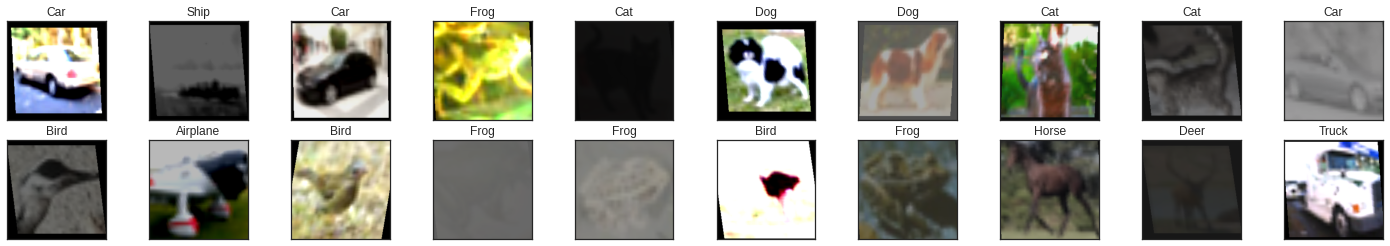

In [ ]:
dataiter = iter(training_loader)
# I divide the data taken from the training set into images and labels

# The next() function takes the first batch of training data.
images, labels = dataiter.next()

# Display images with labels. 
fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])   # 2 rows, 10 kolumns, 1 - indeks
    plt.imshow(im_convert(images[idx]))
    plt.savefig("CIFAR-10.tiff", dpi=300)
    ax.set_title(classes[labels[idx].item()])


## Model

In [ ]:
# I create the model 
model = models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


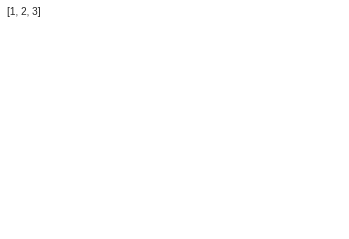

In [ ]:
fig, ax = plt.subplots()
array=[1,2,3]
fig=plt.text(0,1,str(array))
ax.axis('off')
plt.savefig('array.png')

In [ ]:
print(model)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
# I process all model parameters in order to "freeze" them:
for param in model.features.parameters():
  param.requires_grad == False

In [ ]:
import torch.nn as nn
# I access the last classifier layer and change it so that it has 10 outputs.
n_inputs = model.classifier[6].in_features
last_layer = nn.Linear(n_inputs, len(classes))

# I change the last layer
model.classifier[6] = last_layer

# Model to GPU
model.to(device)

# Display the model again
print(model)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

In [ ]:
# I create an empty matrix whose dimensions depend on the number of classes
rows, cols = (len(classes), len(classes)) 

Tmatrix = []
row = []

for i in range(rows):
  col = []
  for j in range(cols):
    col.append([])
  Tmatrix.append(col)

In [ ]:
# State matrix filling function
def add_Tmatrix(idx_row, idx_prob, val_prob):
   Tmatrix[idx_row][idx_prob].append(val_prob)
  

In [ ]:
for row in Tmatrix:
    # Loop over columns.
    for column in row:
        print(column, end=", ")
    print(end="\n")

[], [], [], [], [], [], [], [], [], [], 
[], [], [], [], [], [], [], [], [], [], 
[], [], [], [], [], [], [], [], [], [], 
[], [], [], [], [], [], [], [], [], [], 
[], [], [], [], [], [], [], [], [], [], 
[], [], [], [], [], [], [], [], [], [], 
[], [], [], [], [], [], [], [], [], [], 
[], [], [], [], [], [], [], [], [], [], 
[], [], [], [], [], [], [], [], [], [], 
[], [], [], [], [], [], [], [], [], [], 


In [ ]:
epochs = 25                         # a
running_loss_history = []           # b
running_corrects_history = []       # c
val_running_loss_history = []       # d
val_running_corrects_history = []   # e

# Acc balanced  
running_corrects_history_balanced = []
val_running_corrects_history_balanced = []

# Probabilities
prop_0 = 0.0
prop_1 = 0.0
prop_2 = 0.0
prop_3 = 0.0
prop_4 = 0.0
prop_5 = 0.0
prop_6 = 0.0
prop_7 = 0.0
prop_8 = 0.0
prop_9 = 0.0

#Lists
prop_0_list = []
prop_1_list = []
prop_2_list = []
prop_3_list = []
prop_4_list = []
prop_5_list = []
prop_6_list = []
prop_7_list = []
prop_8_list = []
prop_9_list = []

for e in range(epochs):

  running_loss = 0.0            # 1                                                                                                                                                          
  running_corrects = 0.0        # 2
  val_running_loss = 0.0        # 3
  val_running_corrects = 0.0    # 4

  running_corrects_out_0 = 0.0
  running_corrects_out_1 = 0.0
  running_corrects_out_2 = 0.0
  running_corrects_out_3 = 0.0
  running_corrects_out_4 = 0.0
  running_corrects_out_5 = 0.0
  running_corrects_out_6 = 0.0
  running_corrects_out_7 = 0.0
  running_corrects_out_8 = 0.0
  running_corrects_out_9 = 0.0

  running_corrects_out_0_val = 0.0
  running_corrects_out_1_val = 0.0
  running_corrects_out_2_val = 0.0
  running_corrects_out_3_val = 0.0
  running_corrects_out_4_val = 0.0
  running_corrects_out_5_val = 0.0
  running_corrects_out_6_val = 0.0
  running_corrects_out_7_val = 0.0
  running_corrects_out_8_val = 0.0
  running_corrects_out_9_val = 0.0
  
  for inputs, labels in training_loader:        

    # In relation to testing the model on the device, I am passing values to the device.
    inputs = inputs.to(device)
    labels = labels.to(device)

    # Outputs
    outputs = model(inputs)                       
    
    # Loss
    loss = criterion(outputs, labels)           
    optimizer.zero_grad()                       
    loss.backward()                             
    optimizer.step()                            

    # Returns a tensor with values and a second tensor with indices
    values, preds = torch.max(outputs, 1)        
  
    # Number of elements for a loop
    preds_size = list(preds.size())

    # I check every prediction
    for idx in range(preds_size[0]):
        
        # Class 0
        if ((preds[idx] == 0) and (preds[idx].item() == labels[idx].item())):
          running_corrects_out_0 += 1

        # Class 1  
        if ((preds[idx] == 1) and (preds[idx].item() == labels[idx].item())):
          running_corrects_out_1 += 1

        # Class 2  
        if ((preds[idx] == 2) and (preds[idx].item() == labels[idx].item())):
          running_corrects_out_2 += 1

        # Class 3  
        if ((preds[idx] == 3) and (preds[idx].item() == labels[idx].item())):
          running_corrects_out_3 += 1 

        # Class 4  
        if ((preds[idx] == 4) and (preds[idx].item() == labels[idx].item())):
          running_corrects_out_4 += 1

        # Class 5  
        if ((preds[idx] == 5) and (preds[idx].item() == labels[idx].item())):
          running_corrects_out_5 += 1

        # Class 6  
        if ((preds[idx] == 6) and (preds[idx].item() == labels[idx].item())):
          running_corrects_out_6 += 1

        # Class 7  
        if ((preds[idx] == 7) and (preds[idx].item() == labels[idx].item())):
          running_corrects_out_7 += 1

        # Class 8  
        if ((preds[idx] == 8) and (preds[idx].item() == labels[idx].item())):
          running_corrects_out_8 += 1

        # Class 9  
        if ((preds[idx] == 9) and (preds[idx].item() == labels[idx].item())):
          running_corrects_out_9 += 1                     

    # Total errors
    running_loss += loss.item()

    # The sum of correct predictions      
    running_corrects += torch.sum(preds == labels.data)
        
  else:
    # Validation of the model
    with torch.no_grad():                                         
      
      for val_inputs, val_labels in validation_loader:          
          
        # Transfer to the device
        val_inputs = val_inputs.to(device)
        val_labels = val_labels.to(device)
          
        # Images into the model
        val_outputs = model(val_inputs)                         

        # Loss
        val_loss = criterion(val_outputs, val_labels)               
            
        # Predictions 
        _, val_preds = torch.max(val_outputs, 1)    
          
        # Number of elements for a loop
        val_preds_size = list(val_preds.size())

        # SoftMax function
        sm = torch.nn.Softmax(dim = -1)
       
        # I check each prediction
        for idx in range(val_preds_size[0]):

          # For each prediction I calculate the probability distribution
          probabilities = sm(val_outputs[idx])
            
          if ((val_preds[idx] == 0) and (val_preds[idx].item() == val_labels[idx].item())):
            running_corrects_out_0_val += 1
            # I fill the matrix with the probability values
            for i in range(torch.numel(probabilities)):
              add_Tmatrix(0, i, probabilities[i].item())
            
          if ((val_preds[idx] == 1) and (val_preds[idx].item() == val_labels[idx].item())):
            running_corrects_out_1_val += 1
            
            for i in range(len(probabilities)):
              add_Tmatrix(1, i, probabilities[i].item())

          if ((val_preds[idx] == 2) and (val_preds[idx].item() == val_labels[idx].item())):
            running_corrects_out_2_val += 1
            
            for i in range(len(probabilities)):
              add_Tmatrix(2, i, probabilities[i].item())
          
          if ((val_preds[idx] == 3) and (val_preds[idx].item() == val_labels[idx].item())):
            running_corrects_out_3_val += 1
            
            for i in range(len(probabilities)):
              add_Tmatrix(3, i, probabilities[i].item())
          
          if ((val_preds[idx] == 4) and (val_preds[idx].item() == val_labels[idx].item())):
            running_corrects_out_4_val += 1
           
            for i in range(len(probabilities)):
              add_Tmatrix(4, i, probabilities[i].item())
          
          if ((val_preds[idx] == 5) and (val_preds[idx].item() == val_labels[idx].item())):
            running_corrects_out_5_val += 1
            
            for i in range(len(probabilities)):
              add_Tmatrix(5, i, probabilities[i].item())

          if ((val_preds[idx] == 6) and (val_preds[idx].item() == val_labels[idx].item())):
            running_corrects_out_6_val += 1
            
            for i in range(len(probabilities)):
              add_Tmatrix(6, i, probabilities[i].item())

          if ((val_preds[idx] == 7) and (val_preds[idx].item() == val_labels[idx].item())):
            running_corrects_out_7_val += 1
            
            for i in range(len(probabilities)):
              add_Tmatrix(7, i, probabilities[i].item())

          if ((val_preds[idx] == 8) and (val_preds[idx].item() == val_labels[idx].item())):
            running_corrects_out_8_val += 1
            
            for i in range(len(probabilities)):
              add_Tmatrix(8, i, probabilities[i].item())

          if ((val_preds[idx] == 9) and (val_preds[idx].item() == val_labels[idx].item())):
            running_corrects_out_9_val += 1
            
            for i in range(len(probabilities)):
              add_Tmatrix(9, i, probabilities[i].item())

        # For each batcha       
        val_running_loss += val_loss.item()                             
        val_running_corrects += torch.sum(val_preds == val_labels.data)
        
    # I calculate global acc i loss 
    epoch_loss = running_loss/len(training_loader)          
    epoch_acc = running_corrects/len(training_loader)   
   
    # Training loader batch size = 100
    tlbs = 100  

    # Acc balanced for each class
    epoch_acc_out_0 = running_corrects_out_0/(training_loader.dataset.targets.count(0)/100)
    epoch_acc_out_1 = running_corrects_out_1/(training_loader.dataset.targets.count(1)/100)
    epoch_acc_out_2 = running_corrects_out_2/(training_loader.dataset.targets.count(2)/100)
    epoch_acc_out_3 = running_corrects_out_3/(training_loader.dataset.targets.count(3)/100)
    epoch_acc_out_4 = running_corrects_out_4/(training_loader.dataset.targets.count(4)/100)
    epoch_acc_out_5 = running_corrects_out_5/(training_loader.dataset.targets.count(5)/100)
    epoch_acc_out_6 = running_corrects_out_6/(training_loader.dataset.targets.count(6)/100)
    epoch_acc_out_7 = running_corrects_out_7/(training_loader.dataset.targets.count(7)/100)
    epoch_acc_out_8 = running_corrects_out_8/(training_loader.dataset.targets.count(8)/100)
    epoch_acc_out_9 = running_corrects_out_9/(training_loader.dataset.targets.count(9)/100)
 
    
    epoch_acc_balanced_sum = epoch_acc_out_0 + epoch_acc_out_1 + epoch_acc_out_2 + epoch_acc_out_3 + epoch_acc_out_4 + epoch_acc_out_5 + epoch_acc_out_6 + epoch_acc_out_7 + epoch_acc_out_8 + epoch_acc_out_9

    # The sum of the acc from each class by their number, so 10.
    epoch_acc_balanced = epoch_acc_balanced_sum/10         
    running_corrects_history_balanced.append(epoch_acc_balanced)

    # Acc global
    running_loss_history.append(epoch_loss)                               
    running_corrects_history.append(epoch_acc)                            

    # Acc global validation
    val_epoch_loss = val_running_loss/len(validation_loader)              
    val_epoch_acc = val_running_corrects/len(validation_loader)  
    
    val_running_loss_history.append(val_epoch_loss)                         
    val_running_corrects_history.append(val_epoch_acc)                    

    # Acc balanced validation. For each class
    val_epoch_acc_out_0 = running_corrects_out_0_val/(validation_loader.dataset.targets.count(0)/100)
    val_epoch_acc_out_1 = running_corrects_out_1_val/(validation_loader.dataset.targets.count(1)/100)
    val_epoch_acc_out_2 = running_corrects_out_2_val/(validation_loader.dataset.targets.count(2)/100)
    val_epoch_acc_out_3 = running_corrects_out_3_val/(validation_loader.dataset.targets.count(3)/100)
    val_epoch_acc_out_4 = running_corrects_out_4_val/(validation_loader.dataset.targets.count(4)/100)
    val_epoch_acc_out_5 = running_corrects_out_5_val/(validation_loader.dataset.targets.count(5)/100)
    val_epoch_acc_out_6 = running_corrects_out_6_val/(validation_loader.dataset.targets.count(6)/100)
    val_epoch_acc_out_7 = running_corrects_out_7_val/(validation_loader.dataset.targets.count(7)/100)
    val_epoch_acc_out_8 = running_corrects_out_8_val/(validation_loader.dataset.targets.count(8)/100)
    val_epoch_acc_out_9 = running_corrects_out_9_val/(validation_loader.dataset.targets.count(9)/100)

    val_epoch_sum = val_epoch_acc_out_0 + val_epoch_acc_out_1 + val_epoch_acc_out_2 + val_epoch_acc_out_3 + val_epoch_acc_out_4 + val_epoch_acc_out_5 + val_epoch_acc_out_6 + val_epoch_acc_out_7 + val_epoch_acc_out_8 + val_epoch_acc_out_9

    val_epoch_acc_balanced = val_epoch_sum/10

    val_running_corrects_history_balanced.append(val_epoch_acc_balanced) 

    print('epoch:', (e+1))                                                                               # 31
    print('training loss: {:.4f}, acc {:.4f}, acc balanced {:.4f} '.format(epoch_loss, epoch_acc.item(), epoch_acc_balanced))                      
    print('validation loss: {:.4f}, validation acc {:.4f}, validation acc balanced {:.4f} '.format(val_epoch_loss, val_epoch_acc.item(), val_epoch_acc_balanced)) 
    print('-----------------------------------------------------------------')



epoch: 1
training loss: 1.1186, acc 60.2240, acc balanced 60.2240 
validation loss: 0.5438, validation acc 81.1700, validation acc balanced 81.1700 
-----------------------------------------------------------------
epoch: 2
training loss: 0.8143, acc 71.2780, acc balanced 71.2780 
validation loss: 0.4511, validation acc 84.4900, validation acc balanced 84.4900 
-----------------------------------------------------------------
epoch: 3
training loss: 0.7242, acc 74.8420, acc balanced 74.8420 
validation loss: 0.4192, validation acc 85.6100, validation acc balanced 85.6100 
-----------------------------------------------------------------
epoch: 4
training loss: 0.6672, acc 76.5960, acc balanced 76.5960 
validation loss: 0.3977, validation acc 86.1400, validation acc balanced 86.1400 
-----------------------------------------------------------------
epoch: 5
training loss: 0.6185, acc 78.1960, acc balanced 78.1960 
validation loss: 0.3918, validation acc 86.0600, validation acc balanced 

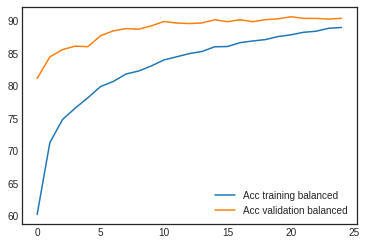

In [ ]:
plt.plot(running_corrects_history_balanced, label = 'Acc training balanced')
plt.plot(val_running_corrects_history,label='Acc validation balanced')  
plt.legend()
plt.savefig("Acc.tiff", dpi=300)

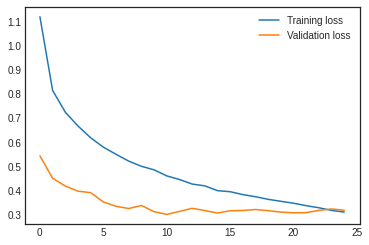

In [ ]:
plt.plot(running_loss_history, label = 'Training loss')
plt.plot(val_running_loss_history,label='Validation loss')  
plt.legend()
plt.savefig("Fig. 5.tiff", dpi=300)

## MCMC

In [ ]:
# Data normalisation (functions)
def matrix_norm(mtx, cls):

  mtx_np = np.asarray(mtx)

  if (mtx.sum()) > 1:
    diff = mtx.sum() - 1
    mtx_np[0][cls] = mtx_np[0][cls] - diff

  if (mtx.sum()) < 1:
    diff = 1 - mtx.sum()
    mtx_np[0][cls] = mtx_np[0][cls] + diff
  
  mtx = np.asmatrix(mtx_np)
  return mtx  

In [ ]:
# Data normalisation (functions)
def first_matrix_norm(mtx, cls):

  mtx_np = np.asarray(mtx)

  if (mtx.sum()) > 1:
    
    diff = mtx.sum() - 1
    mtx_np[cls] = mtx_np[cls] - diff

  if (mtx.sum()) < 1:
    diff = 1 - mtx.sum()
    mtx_np[cls] = mtx_np[cls] + diff
  
  mtx = np.asmatrix(mtx_np)
  return mtx  

In [ ]:
# MCMC
# Probability distribution (lists)
points_0 = []
points_1 = []
points_2 = []
points_3 = []
points_4 = []
points_5 = []
points_6 = []
points_7 = []
points_8 = []
points_9 = []

prob_points = []

# Number of correct matches for classes
running_corrects_out_0_val = 0.0
running_corrects_out_1_val = 0.0
running_corrects_out_2_val = 0.0
running_corrects_out_3_val = 0.0
running_corrects_out_4_val = 0.0
running_corrects_out_5_val = 0.0
running_corrects_out_6_val = 0.0
running_corrects_out_7_val = 0.0
running_corrects_out_8_val = 0.0
running_corrects_out_9_val = 0.0

# Monte Carlo (shuffle)
mcmc_loader = torch.utils.data.DataLoader(validation_dataset, batch_size = 5, shuffle=True)


# Creating a transposed matrix
T_temp = []
T_temp_avg = []

for row in Tmatrix:
    col_mean = []
    col_avg = []

    for column in row:
        value = np.mean(column).astype(float)
        col_mean.append(value)

    print(end="\n")
    T_temp.append(col_mean)

# Conversion
T_temp_array = np.array(T_temp)

# I normalize to a stochastic matrix.
for i in range(10): 
  if (T_temp_array[i].sum()) > 1:
    diff = T_temp_array[i].sum() - 1
    T_temp_array[i][0] = T_temp_array[i][0] - diff

  if (T_temp_array[i].sum()) < 1:
    diff = 1 - T_temp_array[i].sum()
    T_temp_array[i][0] = T_temp_array[i][0] + diff

# Transposed matrix
T_temp_mtx = np.asmatrix(T_temp_array)

# Variable declaration
mcmc_idx = 0
mcmc_count = 5

# Standard deviations for each class
std_0 = 0.0
std_1 = 0.0
std_2 = 0.0
std_3 = 0.0
std_4 = 0.0
std_5 = 0.0
std_6 = 0.0
std_7 = 0.0
std_8 = 0.0
std_9 = 0.0

std_sum = 100

# Arithmetical means for the graphs for each class
mean_0 = 0.0
mean_1 = 0.0
mean_2 = 0.0
mean_3 = 0.0
mean_4 = 0.0
mean_5 = 0.0
mean_6 = 0.0
mean_7 = 0.0
mean_8 = 0.0
mean_9 = 0.0

mean_sum = 0.0

# Main Markov chains for each class
mc_line_0_main = []
mc_line_1_main = []
mc_line_2_main = []
mc_line_3_main = []
mc_line_4_main = []
mc_line_5_main = []
mc_line_6_main = []
mc_line_7_main = []
mc_line_8_main = []
mc_line_9_main = []

main_curr_line_0 = []
main_curr_line_1 = []  
main_curr_line_2 = [] 
main_curr_line_3 = []  
main_curr_line_4 = []  
main_curr_line_5 = []  
main_curr_line_6 = []  
main_curr_line_7 = []  
main_curr_line_8 = []
main_curr_line_9 = []


with torch.no_grad():

  ### MCMC_COUNT - number of iterations
  for mcmc_idx in range(mcmc_count):
    
    # Markov chains for the individual loop
    mc_line_0 = []
    mc_line_1 = []
    mc_line_2 = []
    mc_line_3 = []
    mc_line_4 = []
    mc_line_5 = []
    mc_line_6 = []
    mc_line_7 = []
    mc_line_8 = []
    mc_line_9 = [] 

    # Current values
    curr_line_0 = []
    curr_line_1 = []  
    curr_line_2 = [] 
    curr_line_3 = []  
    curr_line_4 = []  
    curr_line_5 = []  
    curr_line_6 = []  
    curr_line_7 = []  
    curr_line_8 = []
    curr_line_9 = []   

    for val_inputs, val_labels in mcmc_loader:          

      val_inputs = val_inputs.to(device)
      val_labels = val_labels.to(device)
          
      # I upload images to the model
      val_outputs = model(val_inputs)

      # Predictions             
      _, val_preds = torch.max(val_outputs, 1)    
          
      # I add a softmax function to the output layer to calculate the probability distribution
      sm = torch.nn.Softmax(dim = -1)
         
      # Number of predictions
      val_preds_size = list(val_preds.size())

      # Classes
      cls_0 = 0
      cls_1 = 1
      cls_2 = 2
      cls_3 = 3
      cls_4 = 4
      cls_5 = 5
      cls_6 = 6
      cls_7 = 7
      cls_8 = 8
      cls_9 = 9

      # Check each prediction
      for idx in range(val_preds_size[0]):

        # Temporary Markov chains
        mc_line_0_tmp = []
        mc_line_1_tmp = []  
        mc_line_2_tmp = [] 
        mc_line_3_tmp = []  
        mc_line_4_tmp = []  
        mc_line_5_tmp = []  
        mc_line_6_tmp = []  
        mc_line_7_tmp = []  
        mc_line_8_tmp = []
        mc_line_9_tmp = []  

        if ((val_preds[idx].item() == val_labels[idx].item())):

          I_prob = sm(val_outputs[idx]).to(device)

          # I change to matrix
          I_prob = I_prob.cpu().numpy()
          n = 0 
          I_prob= first_matrix_norm(I_prob, cls_0)

          # Initial distribution
          curr_line_0.append(I_prob.item(cls_0))
          curr_line_1.append(I_prob.item(cls_1)) 
          curr_line_2.append(I_prob.item(cls_2))
          curr_line_3.append(I_prob.item(cls_3))
          curr_line_4.append(I_prob.item(cls_4)) 
          curr_line_5.append(I_prob.item(cls_5))
          curr_line_6.append(I_prob.item(cls_6))
          curr_line_7.append(I_prob.item(cls_7))
          curr_line_8.append(I_prob.item(cls_8))
          curr_line_9.append(I_prob.item(cls_9))

          mc_line_0_tmp.append(I_prob.item(cls_0))
          mc_line_1_tmp.append(I_prob.item(cls_1))
          mc_line_2_tmp.append(I_prob.item(cls_2))
          mc_line_3_tmp.append(I_prob.item(cls_3))
          mc_line_4_tmp.append(I_prob.item(cls_4))
          mc_line_5_tmp.append(I_prob.item(cls_5))
          mc_line_6_tmp.append(I_prob.item(cls_6))
          mc_line_7_tmp.append(I_prob.item(cls_7))
          mc_line_8_tmp.append(I_prob.item(cls_8))
          mc_line_9_tmp.append(I_prob.item(cls_9))
          
          for n in range(1001):
            Tnext = I_prob * T_temp_mtx      # Matrix multiplication

            # Adding points to the chain
            mc_line_0_tmp.append(Tnext.item(cls_0))
            mc_line_1_tmp.append(Tnext.item(cls_1))
            mc_line_2_tmp.append(Tnext.item(cls_2))
            mc_line_3_tmp.append(Tnext.item(cls_3))
            mc_line_4_tmp.append(Tnext.item(cls_4))
            mc_line_5_tmp.append(Tnext.item(cls_5))
            mc_line_6_tmp.append(Tnext.item(cls_6))
            mc_line_7_tmp.append(Tnext.item(cls_7))
            mc_line_8_tmp.append(Tnext.item(cls_8))
            mc_line_9_tmp.append(Tnext.item(cls_9))
          
            # Sampling
            if(n==1000):  

              points_0.append(Tnext.item(cls_0)) 
              points_1.append(Tnext.item(cls_1)) 
              points_2.append(Tnext.item(cls_2)) 
              points_3.append(Tnext.item(cls_3)) 
              points_4.append(Tnext.item(cls_4)) 
              points_5.append(Tnext.item(cls_5)) 
              points_6.append(Tnext.item(cls_6)) 
              points_7.append(Tnext.item(cls_7)) 
              points_8.append(Tnext.item(cls_8)) 
              points_9.append(Tnext.item(cls_9)) 

              # The end of the Markov chain 
              mc_line_0.append(mc_line_0_tmp)
              mc_line_1.append(mc_line_1_tmp)
              mc_line_2.append(mc_line_2_tmp)
              mc_line_3.append(mc_line_3_tmp)
              mc_line_4.append(mc_line_4_tmp)
              mc_line_5.append(mc_line_5_tmp)
              mc_line_6.append(mc_line_6_tmp)
              mc_line_7.append(mc_line_7_tmp)
              mc_line_8.append(mc_line_8_tmp)
              mc_line_9.append(mc_line_9_tmp)

            I_prob = Tnext
            I_prob= matrix_norm(I_prob, cls_0) 
            n=+1

    # For each MCMC loop I calculate the standard deviation 
    sum_classes_loop = points_0 + points_1 + points_2 + points_3 + points_4 + points_5 + points_6 + points_7 + points_8 + points_9 
    std_mcmc_loop = np.std(sum_classes_loop)

    all_points = []

    if (std_mcmc_loop < std_sum):
      
      std_sum = std_mcmc_loop

      # All probabilities
      all_points = points_0 + points_1 + points_2 + points_3 + points_4 + points_5 + points_6 + points_7 + points_8 + points_9
      
      # Overall standard deviation for individual classes
      std_0 = np.std(points_0)
      std_1 = np.std(points_1)
      std_2 = np.std(points_2)
      std_3 = np.std(points_3)
      std_4 = np.std(points_4)
      std_5 = np.std(points_5)
      std_6 = np.std(points_6)
      std_7 = np.std(points_7)
      std_8 = np.std(points_8)
      std_9 = np.std(points_9)

      std_sum = np.std(all_points)              
      
      # I add for each loop
      mc_line_0_main = mc_line_0
      mc_line_1_main = mc_line_1
      mc_line_2_main = mc_line_2
      mc_line_3_main = mc_line_3
      mc_line_4_main = mc_line_4
      mc_line_5_main = mc_line_5
      mc_line_6_main = mc_line_6
      mc_line_7_main = mc_line_7
      mc_line_8_main = mc_line_8
      mc_line_9_main = mc_line_9

  print("Standard deviation for all probabilities:", std_sum)    
  print("Count of MCMC loop: ", mcmc_idx + 1)
  mcmc_idx=+1











Odchylenie standardowe: 0.015311846320358532
Liczba próbek: 9053
Odchylenie standardowe: 0.015311846371974747
Liczba próbek: 9023
Odchylenie standardowe: 0.015311846235491498
Liczba próbek: 9065
Odchylenie standardowe: 0.015311846199433201
Liczba próbek: 9037
Odchylenie standardowe: 0.015311846162012002
Liczba próbek: 9045
Odchylenie standardowe dla wszystkich p-stw: 0.015311846162012002
Count of MCMC loop:  5


In [ ]:
# Normalization. The function returns a normalised list.
def norm_list(a):
  amin, amax = min(a), max(a)
  for i, val in enumerate(a):
    a[i] = (val-amin) / (amax-amin)
  return a

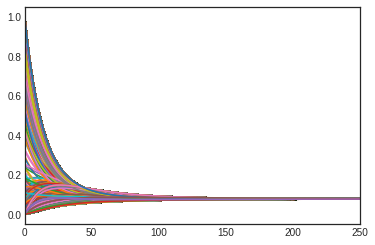

In [ ]:
# Graphic presentation of a Markov chain for class 0
for i in range(len(mc_line_0_main)):
  plt.plot(mc_line_0_main[i])
plt.xlim(0, 250)
#plt.savefig("graph_0.pdf")
plt.savefig("Fig. 6.tiff", dpi=300)
plt.show()

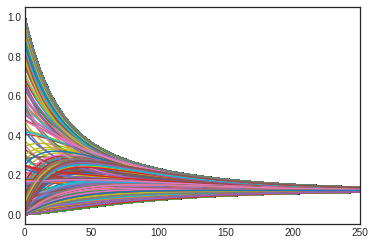

In [ ]:
# GGraphic presentation of a Markov chain for class 1
for i in range(len(mc_line_1_main)):
  plt.plot(mc_line_1_main[i])
plt.xlim(0, 250)
#plt.savefig("graph_1.pdf")
plt.savefig("Fig. 7.tiff", dpi=300)
plt.show()

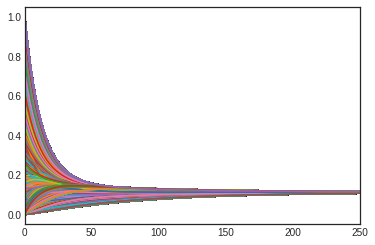

In [ ]:
# Graphic presentation of a Markov chain for class 2
for i in range(len(mc_line_2_main)):
  plt.plot(mc_line_2_main[i])
plt.xlim(0, 250)
#plt.savefig("graph_2.pdf", dpi=300)
plt.savefig("Fig. 8.tiff", dpi=300)
plt.show()

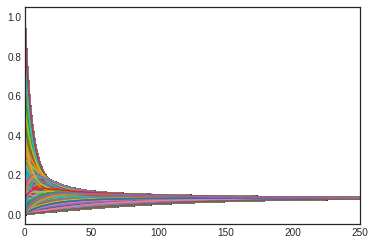

In [ ]:
# Graphic presentation of a Markov chain for class 3
for i in range(len(mc_line_3_main)):
  plt.plot(mc_line_3_main[i])
plt.xlim(0, 250)
#plt.savefig("graph_3.pdf")
plt.savefig("Fig. 9.tiff", dpi=300)
plt.show()

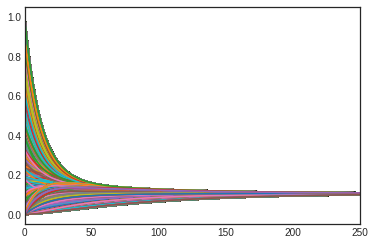

In [ ]:
# Graphic presentation of a Markov chain for class 4
for i in range(len(mc_line_4_main)):
  plt.plot(mc_line_4_main[i])
plt.xlim(0, 250)
#plt.savefig("graph_4.pdf")
plt.savefig("Fig. 10.tiff", dpi=300)
plt.show()

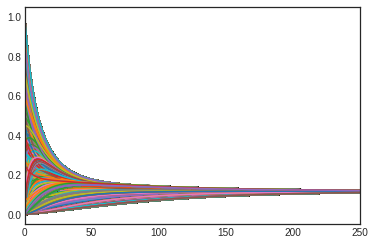

In [ ]:
# Graphic presentation of a Markov chain for class 5
for i in range(len(mc_line_5_main)):
  plt.plot(mc_line_5_main[i])
plt.xlim(0, 250)
#plt.savefig("graph_5.pdf")
plt.savefig("Fig. 11.tiff", dpi=300)
plt.show()

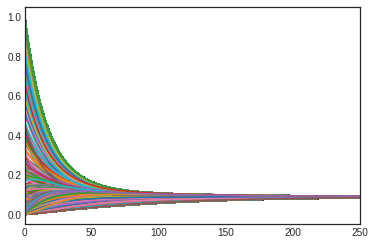

In [ ]:
# Graphic presentation of a Markov chain for class 6
for i in range(len(mc_line_6_main)):
  plt.plot(mc_line_6_main[i])
plt.xlim(0, 250)
#plt.savefig("graph_6.pdf")
plt.savefig("Fig. 12.tiff", dpi=300)
plt.show()

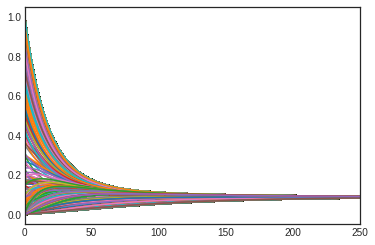

In [ ]:
# Graphic presentation of a Markov chain for class 7
for i in range(len(mc_line_7_main)):
  plt.plot(mc_line_7_main[i])
plt.xlim(0, 250)
#plt.savefig("graph_7.pdf")
plt.savefig("Fig. 13.tiff", dpi=300)
plt.show()

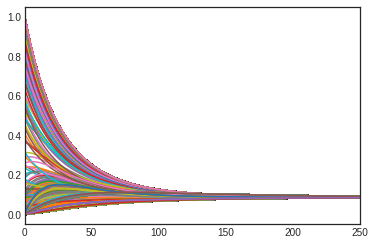

In [ ]:
# Graphic presentation of a Markov chain for class 8
for i in range(len(mc_line_8_main)):
  plt.plot(mc_line_8_main[i])
plt.xlim(0, 250)
#plt.savefig("graph_8.pdf")
plt.savefig("Fig. 14.tiff", dpi=300)
plt.show()

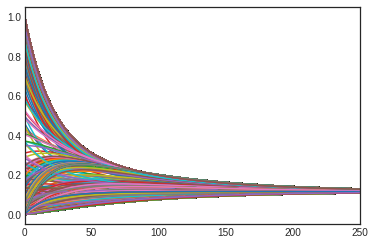

In [ ]:
# Graphic presentation of a Markov chain for class 9
for i in range(len(mc_line_9_main)):
  plt.plot(mc_line_9_main[i])
plt.xlim(0, 250)
#plt.savefig("graph_9.pdf")
plt.savefig("Fig. 15.tiff", dpi=300)
plt.show()

In [ ]:
# Preparing data for a histogram

# Class 0
class_0 = norm_list(points_0)
curr_class_0 = norm_list(curr_line_0)
a_curr_class_0 = norm_list(a_curr_line_0)
j_curr_class_0 = norm_list(j_curr_line_0)

# Class 1
class_1 = norm_list(points_1)
curr_class_1 = norm_list(curr_line_1)
a_curr_class_1 = norm_list(a_curr_line_1)
j_curr_class_1 = norm_list(j_curr_line_1)

# Class 2
class_2 = norm_list(points_2)
curr_class_2 = norm_list(curr_line_2)
a_curr_class_2 = norm_list(a_curr_line_2)
j_curr_class_2 = norm_list(j_curr_line_2)

# Class 3
class_3 = norm_list(points_3)
curr_class_3 = norm_list(curr_line_3)
a_curr_class_3 = norm_list(a_curr_line_3)
j_curr_class_3 = norm_list(j_curr_line_3)

# Class 4
class_4 = norm_list(points_4)
curr_class_4 = norm_list(curr_line_4)
a_curr_class_4 = norm_list(a_curr_line_4)
j_curr_class_4 = norm_list(j_curr_line_4)

# Class 5
class_5 = norm_list(points_5)
curr_class_5 = norm_list(curr_line_5)
a_curr_class_5 = norm_list(a_curr_line_5)
j_curr_class_5 = norm_list(j_curr_line_5)

# Class 6
class_6 = norm_list(points_6)
curr_class_6 = norm_list(curr_line_6)
a_curr_class_6 = norm_list(a_curr_line_6)
j_curr_class_6 = norm_list(j_curr_line_6)

# Class 7
class_7 = norm_list(points_7)
curr_class_7 = norm_list(curr_line_7)
a_curr_class_7 = norm_list(a_curr_line_7)
j_curr_class_7 = norm_list(j_curr_line_7)

# Class 8
class_8 = norm_list(points_8)
curr_class_8 = norm_list(curr_line_8)
a_curr_class_8 = norm_list(a_curr_line_8)
j_curr_class_8 = norm_list(j_curr_line_8)

# Class 9
class_9 = norm_list(points_9)
curr_class_9 = norm_list(curr_line_9)
a_curr_class_9 = norm_list(a_curr_line_9)
j_curr_class_9 = norm_list(j_curr_line_9)

# Sum to last histogram
class_sum = class_0 + class_1 + class_2 + class_3 + class_4 + class_5 + class_6 + class_7 + class_8 + class_9
curr_class_sum = curr_class_0 + curr_class_1 + curr_class_2 + curr_class_3 + curr_class_4 + curr_class_5 + curr_class_6 + curr_class_7 + curr_class_8 + curr_class_9


In [ ]:
# Arithmetical means
mean_0 = np.mean(np.array(points_0))
mean_1 = np.mean(np.array(points_1))
mean_2 = np.mean(np.array(points_2))
mean_3 = np.mean(np.array(points_3))
mean_4 = np.mean(np.array(points_4))
mean_5 = np.mean(np.array(points_5))
mean_6 = np.mean(np.array(points_6))
mean_7 = np.mean(np.array(points_7))
mean_8 = np.mean(np.array(points_8))
mean_9 = np.mean(np.array(points_9))

mean_sum_2 = np.mean(np.array(class_sum))
mean_sum = (mean_0 + mean_1 + mean_2 + mean_3 + mean_4 + mean_5 + mean_6 + mean_7 + mean_8 + mean_9)/10
mean_sum_3 = mean_0 + mean_1 + mean_2 + mean_3 + mean_4 + mean_5 + mean_6 + mean_7 + mean_8 + mean_9

In [ ]:
# Current arithmetical means
mean_0_curr = np.mean(np.array(curr_class_0))
mean_1_curr = np.mean(np.array(curr_class_1))
mean_2_curr = np.mean(np.array(curr_class_2))
mean_3_curr = np.mean(np.array(curr_class_3))
mean_4_curr = np.mean(np.array(curr_class_4))
mean_5_curr = np.mean(np.array(curr_class_5))
mean_6_curr = np.mean(np.array(curr_class_6))
mean_7_curr = np.mean(np.array(curr_class_7))
mean_8_curr = np.mean(np.array(curr_class_8))
mean_9_curr = np.mean(np.array(curr_class_9))

mean_sum_curr = (mean_0_curr + mean_1_curr + mean_2_curr + mean_3_curr + mean_4_curr + mean_5_curr + mean_6_curr + mean_7_curr + mean_8_curr + mean_9_curr)/10

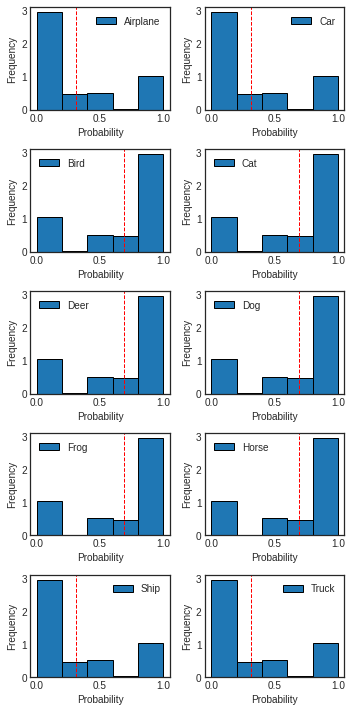

In [ ]:
# Histograms for samples with stationary distribution (for each class)

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(5, 10))
ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9 = axes.flatten() 

kwargs = dict(histtype='bar', bins=5, density=True, edgecolor="black")

ax0.hist(class_0, label=['Airplane'], **kwargs)
ax0.axvline(mean_0, color='red', linestyle='dashed', linewidth=1)
ax0.legend(prop={'size': 10})
#ax0.set_title('Ants')
ax0.set_ylabel('Frequency')
ax0.set_xlabel('Probability')

ax1.hist(class_1, label=['Car'], **kwargs)
ax1.axvline(mean_1, color='red', linestyle='dashed', linewidth=1)
ax1.legend(prop={'size': 10})
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Probability')

ax2.hist(class_2, label=['Bird'], **kwargs)
ax2.axvline(mean_2, color='red', linestyle='dashed', linewidth=1)
ax2.legend(prop={'size': 10})
ax2.set_ylabel('Frequency')
ax2.set_xlabel('Probability')

ax3.hist(class_3, label=['Cat'], **kwargs)
ax3.axvline(mean_3, color='red', linestyle='dashed', linewidth=1)
ax3.legend(prop={'size': 10})
ax3.set_ylabel('Frequency')
ax3.set_xlabel('Probability')

ax4.hist(class_4, label=['Deer'], **kwargs)
ax4.axvline(mean_4, color='red', linestyle='dashed', linewidth=1)
ax4.legend(prop={'size': 10})
ax4.set_ylabel('Frequency')
ax4.set_xlabel('Probability')

ax5.hist(class_5, label=['Dog'], **kwargs)
ax5.axvline(mean_5, color='red', linestyle='dashed', linewidth=1)
ax5.legend(prop={'size': 10})
ax5.set_ylabel('Frequency')
ax5.set_xlabel('Probability')

ax6.hist(class_6, label=['Frog'], **kwargs)
ax6.axvline(mean_6, color='red', linestyle='dashed', linewidth=1)
ax6.legend(prop={'size': 10})
ax6.set_ylabel('Frequency')
ax6.set_xlabel('Probability')

ax7.hist(class_7, label=['Horse'], **kwargs)
ax7.axvline(mean_7, color='red', linestyle='dashed', linewidth=1)
ax7.legend(prop={'size': 10})
ax7.set_ylabel('Frequency')
ax7.set_xlabel('Probability')

ax8.hist(class_8, label=['Ship'], **kwargs)
ax8.axvline(mean_8, color='red', linestyle='dashed', linewidth=1)
ax8.legend(prop={'size': 10})
ax8.set_ylabel('Frequency')
ax8.set_xlabel('Probability')

ax9.hist(class_9, label=['Truck'], **kwargs)
ax9.axvline(mean_9, color='red', linestyle='dashed', linewidth=1)
ax9.legend(prop={'size': 10})
ax9.set_ylabel('Frequency')
ax9.set_xlabel('Probability')

# Display
fig.tight_layout()
plt.savefig("Fig. 16.tiff", dpi=300)
plt.show()

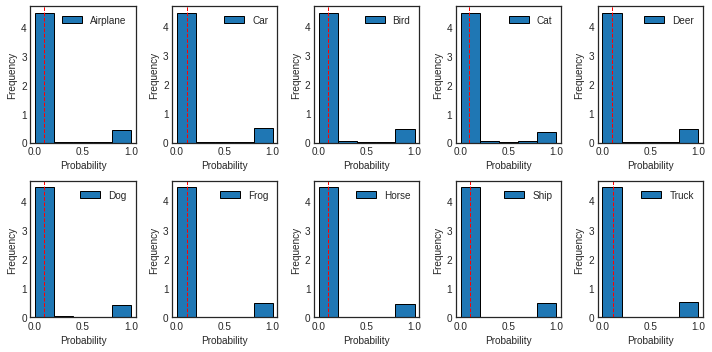

In [ ]:
# Histogram for initial distribution (for each class)

#fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(5, 10))
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9 = axes.flatten()

kwargs = dict(histtype='bar', bins=5, density=True, edgecolor="black")

ax0.hist(curr_class_0, label=['Airplane'], **kwargs)
ax0.axvline(mean_0_curr, color='red', linestyle='dashed', linewidth=1)
ax0.legend(prop={'size': 10})
#ax0.set_title('Ants')
ax0.set_ylabel('Frequency')
ax0.set_xlabel('Probability')

ax1.hist(curr_class_1, label=['Car'], **kwargs)
ax1.axvline(mean_1_curr, color='red', linestyle='dashed', linewidth=1)
ax1.legend(prop={'size': 10})
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Probability')

ax2.hist(curr_class_2, label=['Bird'], **kwargs)
ax2.axvline(mean_2_curr, color='red', linestyle='dashed', linewidth=1)
ax2.legend(prop={'size': 10})
ax2.set_ylabel('Frequency')
ax2.set_xlabel('Probability')

ax3.hist(curr_class_3, label=['Cat'], **kwargs)
ax3.axvline(mean_3_curr, color='red', linestyle='dashed', linewidth=1)
ax3.legend(prop={'size': 10})
ax3.set_ylabel('Frequency')
ax3.set_xlabel('Probability')

ax4.hist(curr_class_4, label=['Deer'], **kwargs)
ax4.axvline(mean_4_curr, color='red', linestyle='dashed', linewidth=1)
ax4.legend(prop={'size': 10})
ax4.set_ylabel('Frequency')
ax4.set_xlabel('Probability')

ax5.hist(curr_class_5, label=['Dog'], **kwargs)
ax5.axvline(mean_5_curr, color='red', linestyle='dashed', linewidth=1)
ax5.legend(prop={'size': 10})
ax5.set_ylabel('Frequency')
ax5.set_xlabel('Probability')

ax6.hist(curr_class_6, label=['Frog'], **kwargs)
ax6.axvline(mean_6_curr, color='red', linestyle='dashed', linewidth=1)
ax6.legend(prop={'size': 10})
ax6.set_ylabel('Frequency')
ax6.set_xlabel('Probability')

ax7.hist(curr_class_7, label=['Horse'], **kwargs)
ax7.axvline(mean_7_curr, color='red', linestyle='dashed', linewidth=1)
ax7.legend(prop={'size': 10})
ax7.set_ylabel('Frequency')
ax7.set_xlabel('Probability')

ax8.hist(curr_class_8, label=['Ship'], **kwargs)
ax8.axvline(mean_8_curr, color='red', linestyle='dashed', linewidth=1)
ax8.legend(prop={'size': 10})
ax8.set_ylabel('Frequency')
ax8.set_xlabel('Probability')

ax9.hist(curr_class_9, label=['Truck'], **kwargs)
ax9.axvline(mean_9_curr, color='red', linestyle='dashed', linewidth=1)
ax9.legend(prop={'size': 10})
ax9.set_ylabel('Frequency')
ax9.set_xlabel('Probability')

# Display
fig.tight_layout()
plt.savefig("Fig. 17b.tiff", dpi=300)
plt.show()

In [ ]:
print(higher_4)

0


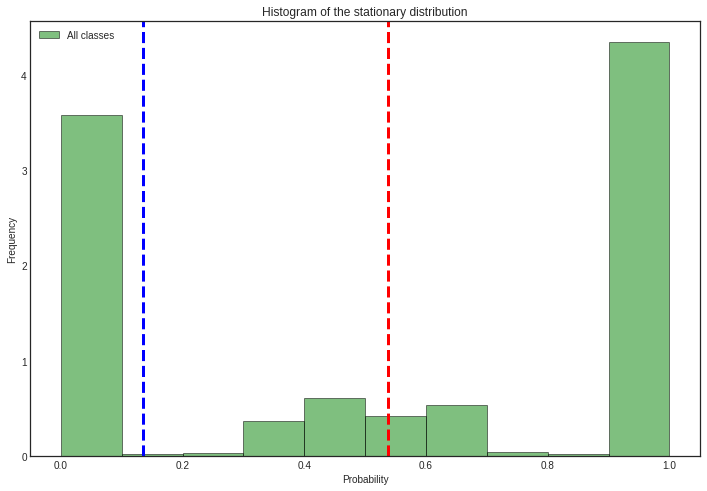

In [ ]:
# Histogram of the stationary distribution (samples)

kwargs = dict(histtype='bar', alpha=0.5, bins=10, density=True, edgecolor="black")
plt.figure(figsize=[12,8])  
plt.hist(class_sum, label=['All classes'], **kwargs, color = "green")  
plt.legend(loc='upper left')
plt.ylabel('Frequency')
plt.xlabel('Probability')
plt.title("Histogram of the stationary distribution")
#fig.tight_layout()

plt.axvline(mean_sum, color='red', linestyle='dashed', linewidth=3)
plt.axvline(0.135, color='blue', linestyle='dashed', linewidth=3)

plt.savefig("Fig. 18.tiff", dpi=300)
plt.show()

In [ ]:
hist, bin_edges = np.histogram(class_sum)
hist

array([159838,   1720,   1326,  17830,  28480,  19560,  26250,   1534,
         1660, 194222])

In [ ]:
hist.sum()

452420

In [ ]:
# Importing the statistics module 
import statistics

# Basic statistics
print('Standard deviation:', statistics.stdev(class_sum))
print('Arithmetical mean:', statistics.mean(class_sum))
print('Median:', statistics.median(class_sum))

Odchylenie standardowe: 0.42663418473643955
Średnia: 0.5390012050474516
Mediana: 0.5730466573136523


In [ ]:
k = 0.132

prov_val = []

for i in class_sum: 
    if i > k: 
        prov_val.append(float(i))


In [ ]:
# Importing the statistics module 
import statistics 
    
x = statistics.mean(prov_val)
print(x)

0.8224774062042535


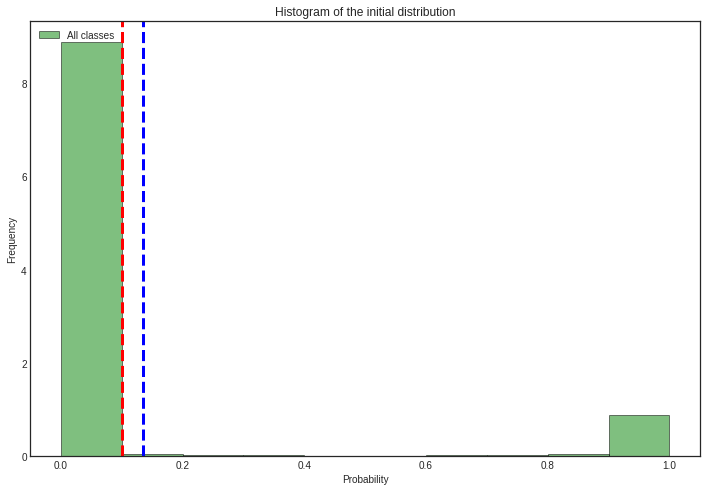

In [ ]:
# Histogram of the initial distribution

kwargs = dict(histtype='bar', alpha=0.5, bins=10, density=True, edgecolor="black")
plt.figure(figsize=[12,8])  # Rozmiar
plt.hist(curr_class_sum, label=['All classes'], **kwargs, color = "green")  
plt.legend(loc='upper left')
plt.ylabel('Frequency')
plt.xlabel('Probability')
plt.title("Histogram of the initial distribution")
#ig.tight_layout()

plt.axvline(mean_sum_curr, color='red', linestyle='dashed', linewidth=3)
plt.axvline(0.135, color='blue', linestyle='dashed', linewidth=3)
plt.savefig("Fig. 19.tiff", dpi=300)
plt.show()

In [ ]:
hist, bin_edges = np.histogram(curr_class_sum)
hist

array([80532,   532,   260,   169,   164,   163,   148,   235,   374,
        8053])

In [ ]:
hist.sum()

90630

In [ ]:
print(len(curr_class_sum))

90630


In [ ]:
bin_edges

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [ ]:
# I select elements from the interval k
k = 0.0
count = len([i for i in curr_class_sum if i >= k])
print(count)

90630


In [ ]:
# Importing the statistics module 
import statistics

# Basic statistics
print('Standard deviation:', statistics.stdev(curr_class_sum))
print('Arithmetical mean:', statistics.mean(curr_class_sum))
print('Median:', statistics.median(curr_class_sum))

Odchylenie standardowe: 0.29040353569611754
Średnia: 0.1000000119409851
Mediana: 1.1920927533992823e-07


In [ ]:
k = 0.1351

prov_val = []

for i in curr_class_sum: 
    if i >= k: 
        prov_val.append(float(i))



In [ ]:
# Importing the statistics module 
import statistics 
    
x = statistics.mean(prov_val)
print(x)

0.9062508808634236


In [ ]:
print(len(prov_val))

9851


In [ ]:
x = statistics.stdev(prov_val)

In [ ]:
print(type(curr_class_sum))

<class 'list'>


# Testing the model

In [ ]:
!pip3 install pillow==4.0.0

     |████████████████████████████████| 11.1MB 5.7MB/s 
     |████████████████████████████████| 112kB 47.9MB/s 
  Created wheel for pillow: filename=Pillow-4.0.0-cp37-cp37m-linux_x86_64.whl size=1007349 sha256=38724a5a83db4f557299f0f974588d6c3ab570a55682b8fce882308106c42c0e
  Stored in directory: /root/.cache/pip/wheels/4f/0a/2a/7e3391063af230fac4b5fdb4cc93adcb1d99af325b623cea03
  Created wheel for olefile: filename=olefile-0.46-py2.py3-none-any.whl size=35416 sha256=e1d8a8f29eedd2a0b2588d71cbae35febf568ae26d47bc568963ea119b7631af
  Stored in directory: /root/.cache/pip/wheels/4b/f4/11/bc4166107c27f07fd7bba707ffcb439619197638a1ac986df3
Successfully built pillow olefile
ERROR: torchvision 0.8.1+cu101 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
ERROR: scikit-image 0.16.2 has requirement pillow>=4.3.0, but you'll have pillow 4.0.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 wh

<Response [200]>


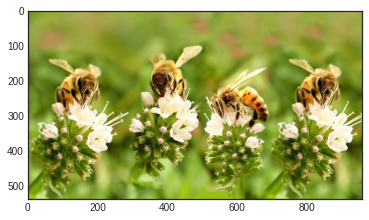

In [ ]:
# https://www.aquariumofpacific.org/images/exhibits/Magnificent_Tree_Frog_900.jpg
import requests
from PIL import Image, ImageOps
url = 'https://www.radiopik.pl/public/info/2020/thumb_960_0/2020-08-08_159689137010.jpg'
response = requests.get(url, stream = True)
print(response)

img = Image.open(response.raw)
plt.imshow(img)

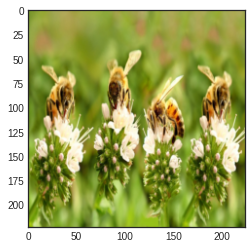

In [ ]:
# Konwertuję obraz.
img = transform(img)
plt.imshow(im_convert(img))

In [ ]:
image = img.to(device).unsqueeze(0)
output = model(image)
_, pred = torch.max(output, 1)
print("This is:", classes[pred.item()])

To jest: Pszczoła


## Testing no 2

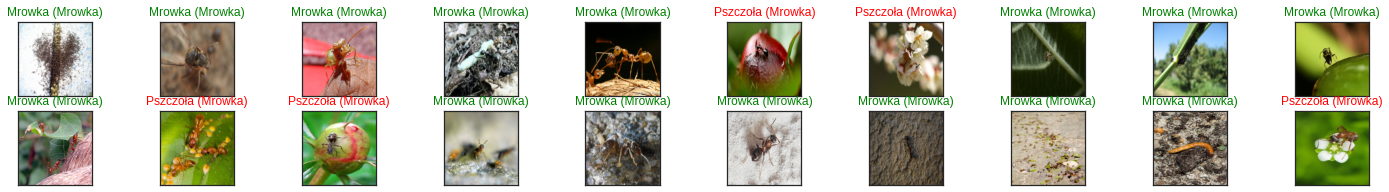

In [ ]:
dataiter = iter(validation_loader)

images, labels = dataiter.next()
#images_ = images.view(images.shape[0], -1)
images_ = images.to(device)
labels = labels.to(device)

output = model(images_)
_, preds = torch.max(output, 1)

fig = plt.figure(figsize=(25, 3))

for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    plt.imshow(im_convert(images[idx]))
    ax.set_title("{} ({})".format(str(classes[preds[idx].item()]), str(classes[labels[idx].item()])), color=("green" if preds[idx]==labels[idx] else "red"))